In [17]:
import os

import numpy as np
import matplotlib.pyplot as plt
import cmocean

USER = os.getenv('USER')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


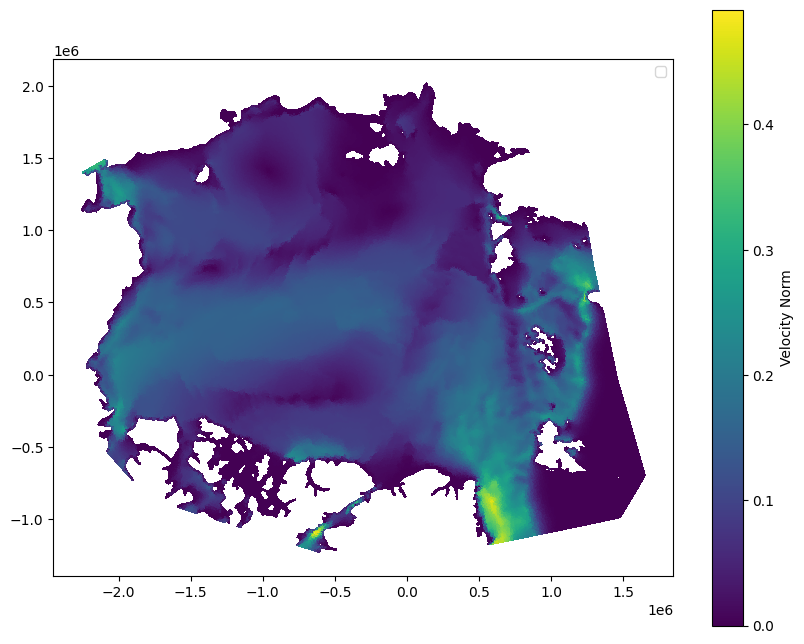

In [14]:
# plot sea ice concentration (for each ELEMENT)
vel_norm = np.sqrt(d0['M_VT_x']**2 + d0['M_VT_y']**2)

plt.figure(figsize=(10,10))
plt.tripcolor(d0['x'], d0['y'], vel_norm, triangles=d0['t'])
plt.colorbar(label='Velocity Norm', shrink=0.8, aspect=20)
plt.gca().set_aspect('equal')
plt.legend()


In [24]:
dir(cmocean.cm)

['MPL_VERSION',
 'Version',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_register_cmap',
 'absolute_import',
 'algae',
 'algae_i',
 'algae_i_r',
 'algae_r',
 'algae_r_i',
 'amp',
 'amp_i',
 'amp_i_r',
 'amp_r',
 'amp_r_i',
 'balance',
 'balance_i',
 'balance_i_r',
 'balance_r',
 'balance_r_i',
 'cmap_d',
 'cmapname',
 'cmapnames',
 'colors',
 'curl',
 'curl_i',
 'curl_i_r',
 'curl_r',
 'curl_r_i',
 'datadir',
 'deep',
 'deep_i',
 'deep_i_r',
 'deep_r',
 'deep_r_i',
 'delta',
 'delta_i',
 'delta_i_r',
 'delta_r',
 'delta_r_i',
 'dense',
 'dense_i',
 'dense_i_r',
 'dense_r',
 'dense_r_i',
 'diff',
 'diff_i',
 'diff_i_r',
 'diff_r',
 'diff_r_i',
 'gray',
 'gray_i',
 'gray_i_r',
 'gray_r',
 'gray_r_i',
 'haline',
 'haline_i',
 'haline_i_r',
 'haline_r',
 'haline_r_i',
 'ice',
 'ice_i',
 'ice_i_r',
 'ice_r',
 'ice_r_i',
 'matter',
 'matter_i',
 'matter_i_r',
 'matter_r',
 'matter_r_i',
 'mpl',
 'np',
 'os',
 'oxy',
 'ox

(900000.0, 1250000.0, -150000.0, 0.0)

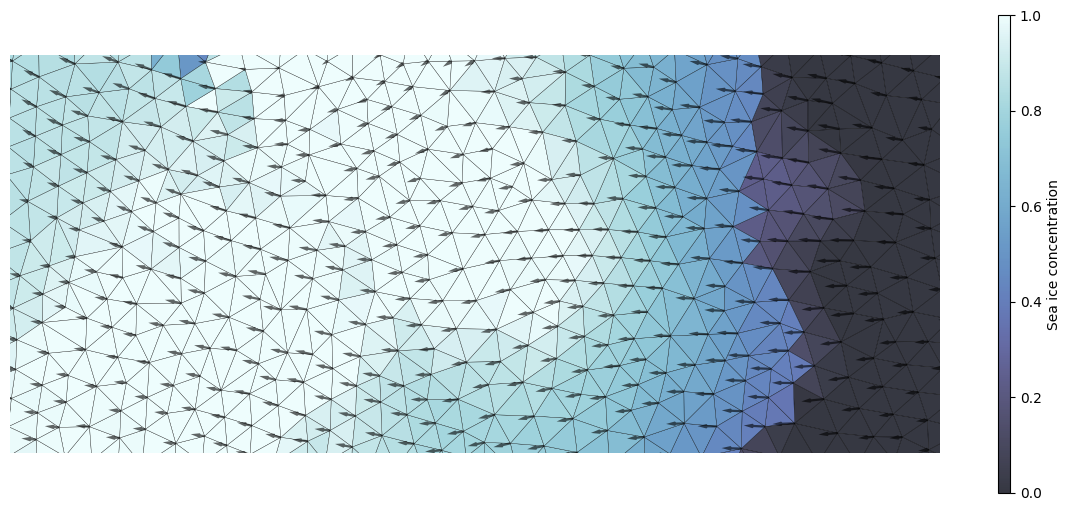

In [63]:
# PLOT TRIANGULATION and SEA ICE DRIFT at ONE MODEL STEP

# file with converted node and element variables
nfile0 = f'../../example_data/field_20230101T180000Z.npz'

# load data into one dict
d0 = dict(np.load(nfile0))

plt.figure(figsize=(15,10))

# x, y are coordinates of nodes
# t - trinagulation, indeces of nodes for each element
im = plt.tripcolor(d0['x'], d0['y'], d0['t'],facecolors=d0['Concentration'], edgecolors='k', cmap=cmocean.cm.ice, alpha=0.8)

# plot M_VT_x, M_VT_y are drift components for each NODE
plt.quiver(d0['x'], d0['y'], d0['M_VT_x'], d0['M_VT_y'], scale=10, headwidth=2, headlength=4, alpha=0.6, color='black')
plt.xlim([0.9e6, 1.25e6])
plt.ylim([-0.15e6, 0e6])
plt.gca().set_aspect('equal')
plt.colorbar(im,label='Sea ice concentration', shrink=0.62, aspect=40)
plt.gca().set_aspect('equal')
#remove axis
plt.axis('off')

In [6]:
d0.keys()

dict_keys(['Damage', 'Concentration', 'Thickness', 'Sigma_0', 'Sigma_1', 'M_VT_x', 'M_VT_y', 'M_wind_x', 'M_wind_y', 'M_ocean_x', 'M_ocean_y', 'x', 'y', 't', 'i'])

In [7]:
for i,key in d0.items():
    print(i,key.shape)

Damage (137736,)
Concentration (137736,)
Thickness (137736,)
Sigma_0 (137736,)
Sigma_1 (137736,)
M_VT_x (70886,)
M_VT_y (70886,)
M_wind_x (70886,)
M_wind_y (70886,)
M_ocean_x (70886,)
M_ocean_y (70886,)
x (70886,)
y (70886,)
t (137736, 3)
i (70886,)


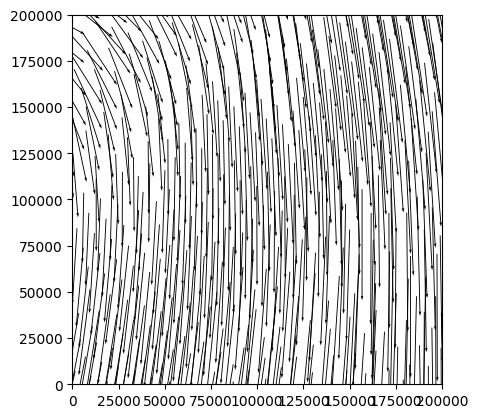

In [8]:
# plot wind speed
plt.quiver(d0['x'], d0['y'], d0['M_wind_x'], d0['M_wind_y'], scale=20)
plt.xlim([0, 0.2e6])
plt.ylim([0, 0.2e6])
plt.gca().set_aspect('equal')

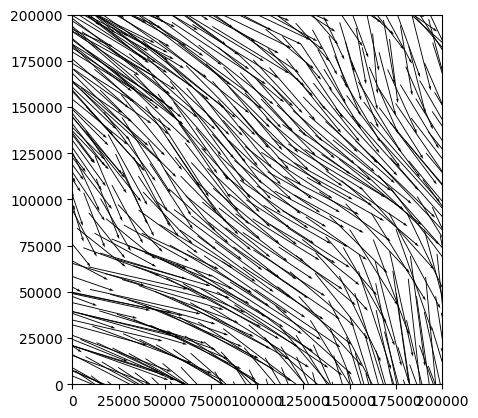

In [9]:
# plot ocean current (notice much smaller scale)
plt.quiver(d0['x'], d0['y'], d0['M_ocean_x'], d0['M_ocean_y'], scale=0.1)
plt.xlim([0, 0.2e6])
plt.ylim([0, 0.2e6])
plt.gca().set_aspect('equal')

In [10]:
d0['M_ocean_x'].shape

(70886,)

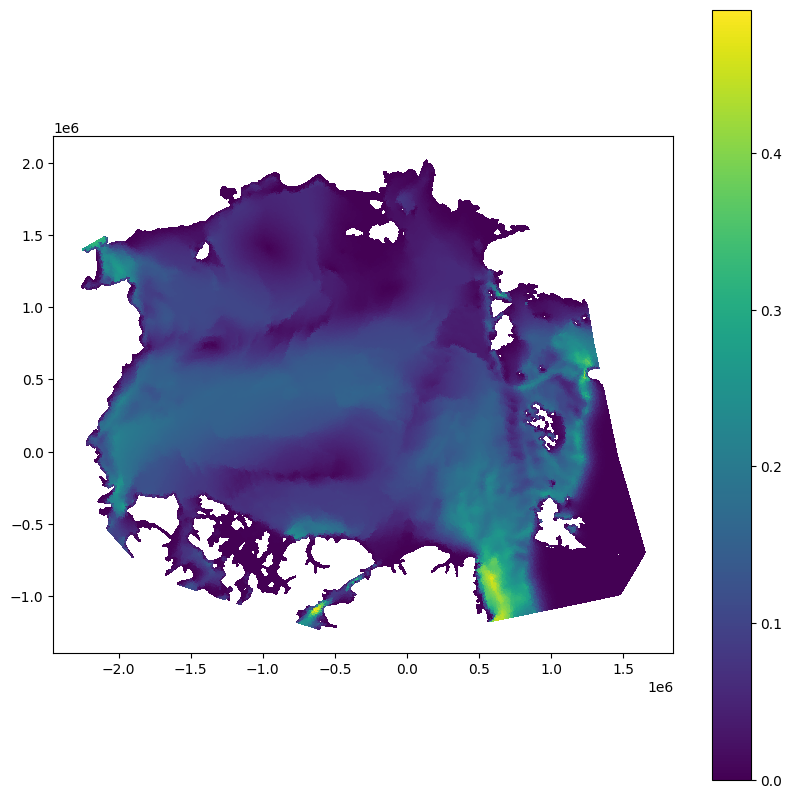

In [11]:
# plot sea ice concentration (for each ELEMENT)
vel_norm = np.sqrt(d0['M_VT_x']**2 + d0['M_VT_y']**2)

plt.figure(figsize=(10,10))
plt.tripcolor(d0['x'], d0['y'], vel_norm, triangles=d0['t'])
plt.colorbar()
plt.gca().set_aspect('equal')

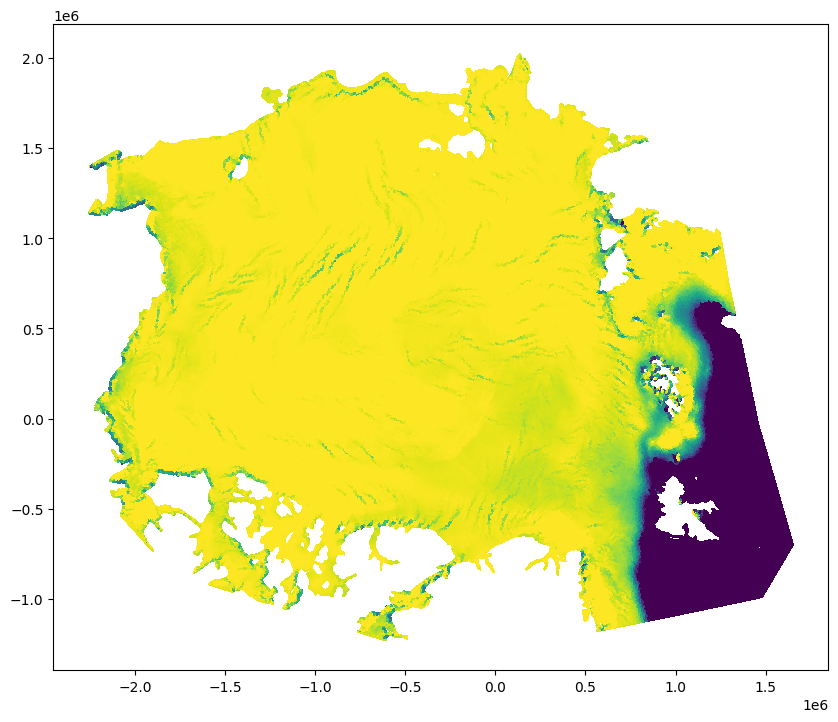

In [12]:
# plot sea ice concentration (for each ELEMENT)
plt.figure(figsize=(10,10))
plt.tripcolor(d0['x'], d0['y'], d0['Concentration'], triangles=d0['t'], vmin=0.5, vmax=1.0)
plt.gca().set_aspect('equal')

(0.0, 200000.0)

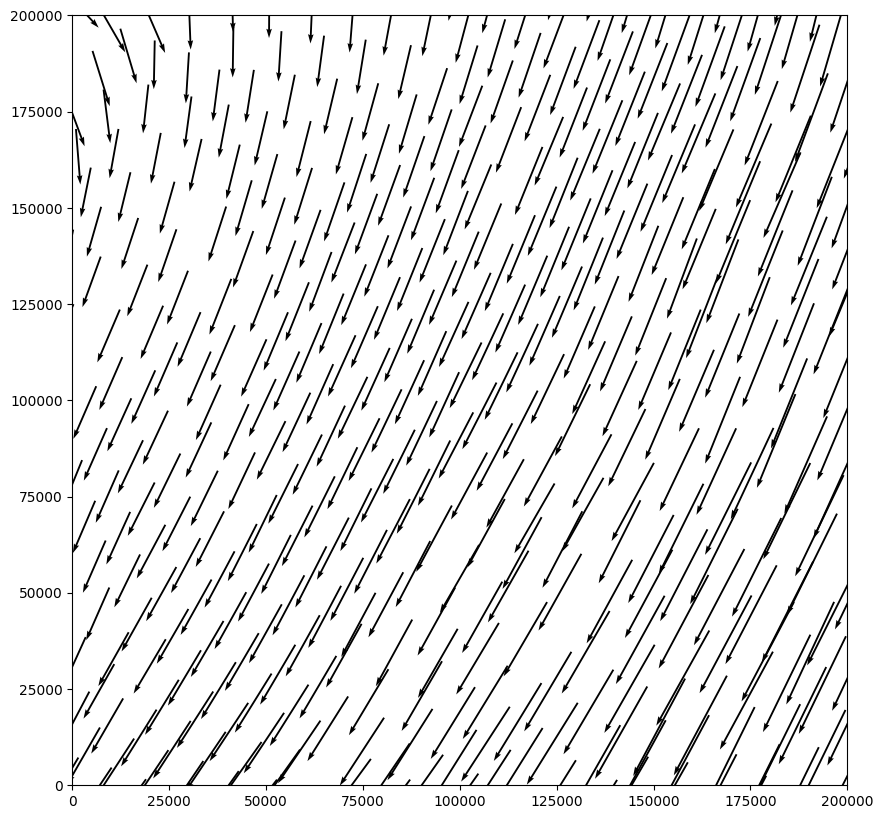

In [16]:
# COMPUTE DRIFT BETWEEN TWO SNAPSHOTS
# Not all the nodes survive - some are removed because of ice convergence and lements becomsing too small.
# Most of the nodes persist, but also new nodes may appear.


# OPEN THE SECOND FILE (output ONE HOUR LATER)
# file with converted node and element variables
nfile1 = f'../../example_data/field_20230101T130000Z.npz'

# load data into one dict from the 
d1 = dict(np.load(nfile1))

# find common nodes on the first and the second files
_, comm0, comm1 = np.intersect1d(d0['i'], d1['i'], assume_unique=True, return_indices=True)

# get common X, Y coordinates
x0 = d0['x'][comm0]
y0 = d0['y'][comm0]
x1 = d1['x'][comm1]
y1 = d1['y'][comm1]

# compute drift [m/s] for two files separated by 1 hour
u = (x1 - x0) / (1 * 60 * 60)
v = (y1 - y0) / (1 * 60 * 60)

plt.figure(figsize=(10,10))
plt.quiver(x0, y0, u, v, scale=1)
plt.xlim([0, 0.2e6])
plt.ylim([0, 0.2e6])